# Ejemplo escalado de datos utilizando el dataset diabetes.csv

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Grafico de la distribución de las variables

<Axes: >

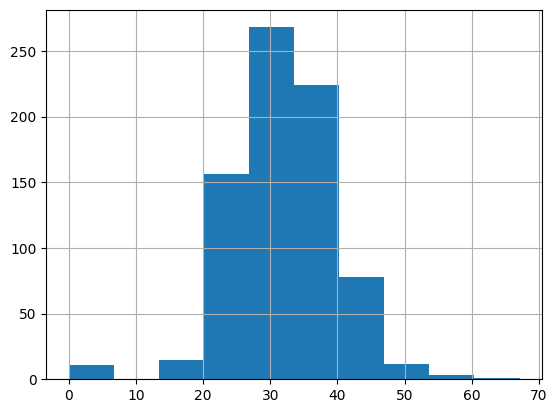

In [4]:
df.BMI.hist()

La variable IBM tiene buena pinta para ser considerada una distribución normal. Es posible hacer una análisis más técnico utilizando una prueba de hipótesis de normalidad, pero por simplicidad diremos que a ojo se distribuye normal.

<Axes: >

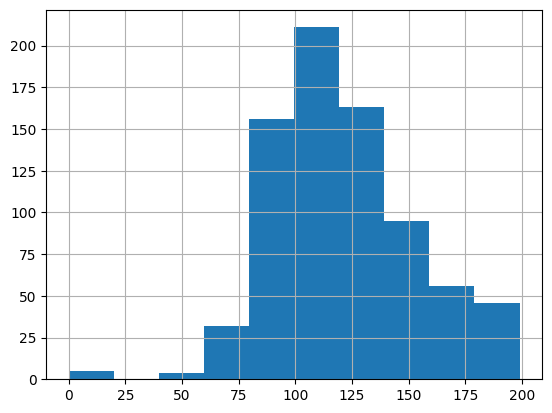

In [5]:
df.Glucose.hist()

También la variable Glucose tambien tiene una distribución que parecería ser normal.

En el caso de la variable Age y Pregnancies, la distribución es claramente no normal.

<Axes: >

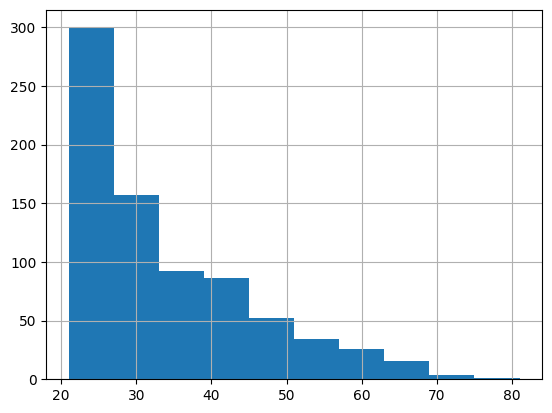

In [6]:
df.Age.hist()

<Axes: >

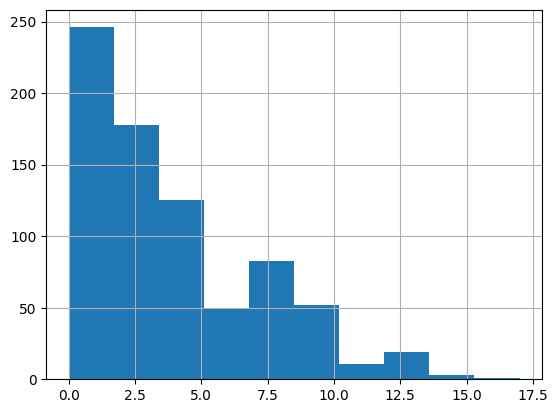

In [7]:
df.Pregnancies.hist()

# Escalado de características de entrada

Si utilizamos estas características en un modelo aprendizaje automático, una buena práctica es llevar a un rango común estas variables. La idea es que independiente de la unidad de medición el rango numérico sea comparable.

Las variables que tienen una distribución aparentemente normal, las escalaremos utilizando la herramienta StandardScaler.

In [8]:
X1 = df[["BMI", "Glucose"]].to_numpy()

In [9]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler(with_mean=True, with_std=True)
std_scaler.fit(X1)

StandardScaler()

In [10]:
X1_scaled = std_scaler.transform(X1)

In [11]:
df["BMI_scaled"] = X1_scaled[:,0]
df["Glucose_scaled"] = X1_scaled[:,1]

Las variables con una distribución no normal las escalamos utilizando la herramienta MinMaxScaler

In [12]:
X2 = df[["Age", "Pregnancies"]].to_numpy()

In [13]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X2)

MinMaxScaler()

In [14]:
X2_scaled = min_max_scaler.transform(X2)

In [15]:
df["Age_scaled"] = X2_scaled[:,0]
df["Pregnancies_scaled"] = X2_scaled[:,1]

# Resultados

A continuación se grafican los resultados, en el lado izquierdo está la variable original, y en el lado derecho el resultado luego de ser escalado

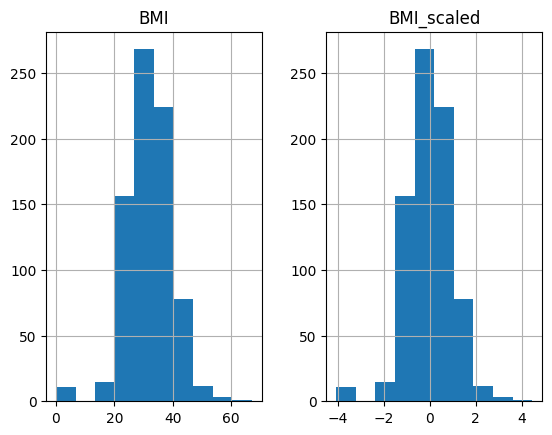

In [16]:
df[["BMI", "BMI_scaled"]].hist();

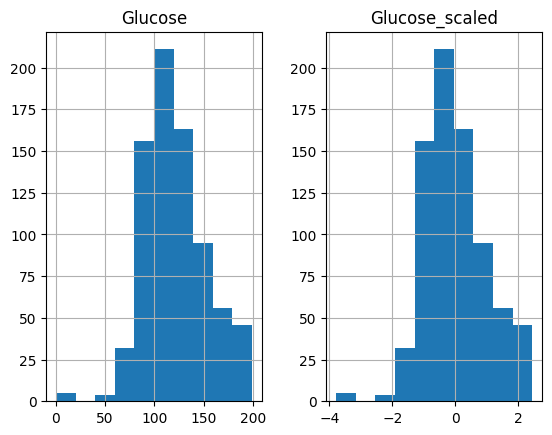

In [17]:
df[["Glucose", "Glucose_scaled"]].hist();

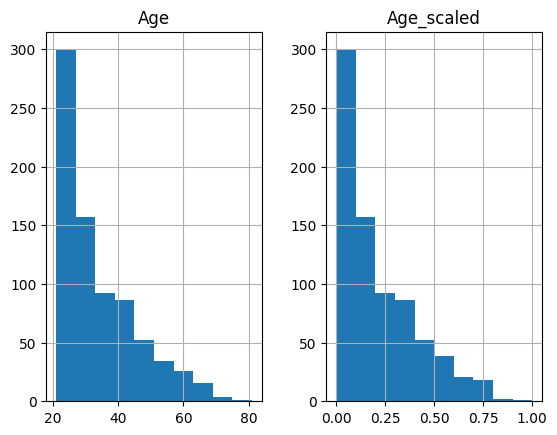

In [18]:
df[["Age", "Age_scaled"]].hist();

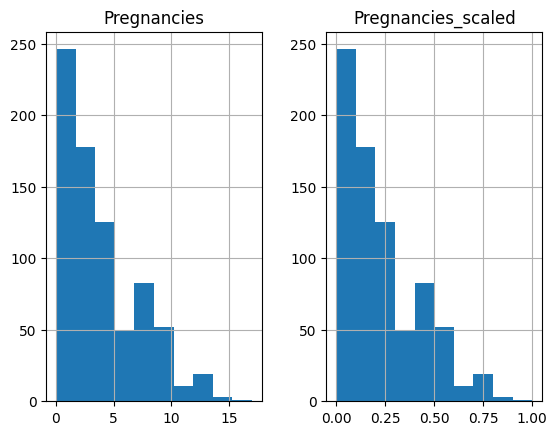

In [19]:
df[["Pregnancies", "Pregnancies_scaled"]].hist();